In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
data = np.loadtxt('../data/processed/JetMasses.txt', skiprows=2, dtype=np.float32)

In [37]:
print(data.shape)

(929013, 11)


In [38]:
print(data[:, 0].shape)

(929013,)


In [49]:
recoP2 = data[:, 6]*np.cosh(data[:, 7])

In [50]:
num_diff = 0
differences = []
for i in range(len(data)):
    p1 = data[i, 10]
    p2 = recoP2[i]
    difference = np.abs(p1 - p2)
    differences.append(difference)
    if (difference > 1e-10):
        num_diff += 1

print(num_diff)
print(num_diff / len(data))


354725
0.3818299636280655


In [51]:
print(max(differences))

0.00048828125


In [52]:
mass1 = data[:, 9]**2 - data[:, 10]**2
mass2 = data[:, 9]**2 - recoP2**2

In [53]:
print(np.min(mass1))
print(np.min(mass2))

-0.125
-0.0625


In [54]:
neg1 = 0
neg2 = 0
neg12 = 0
for i in range(len(data)):
    if mass1[i] < 0:
        neg1 += 1
    if mass2[i] < 0:
        neg2 += 1
    if mass1[i] < 0 and mass2[i] < 0:
        neg12 += 1
    #if (mass1[i] < 0 and mass2[i] >= 0) or (mass1[i] >= 0 and mass2[i] < 0):
      #  print(i)
print(neg1)
print(neg1*100/len(data))
print(neg2)
print(neg2*100/len(data))
print(neg12)
print(neg12*100/len(data))

25
0.0026910280049902424
39
0.004198003687784778
8
0.0008611289615968775


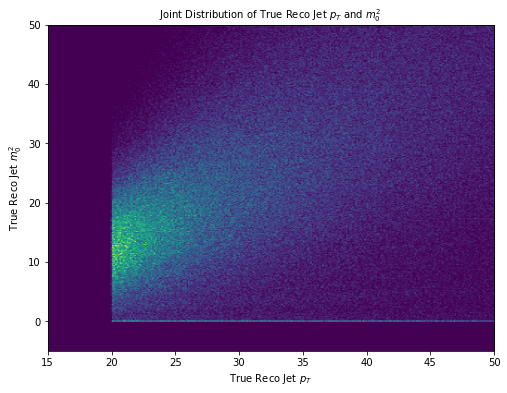

In [30]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
x_low = 15
x_hi = 50
y_low = -5
y_hi = 50
num_bins = 300
h2, xbins, ybins = np.histogram2d(data[:, 0], mass1, range=[[x_low, x_hi], [y_low, y_hi]], bins=num_bins)
ax1.imshow(h2.T, origin='lower', aspect='auto', extent=(x_low, x_hi, y_low, y_hi))
ax1.set_xlabel(r"True Reco Jet $p_T$")
ax1.set_ylabel(r"True Reco Jet $m_0^2$")
ax1.set_title(r"Joint Distribution of True Reco Jet $p_T$ and $m_0^2$ ", size=10)
plt.show()

In [71]:
partonMass1 = data[:, 3]**2 - data[:, 5]**2
partonMass2 = data[:, 3]**2 - (data[:, 0]*np.cosh(data[:, 1]))**2

In [57]:
numNeg = 0
negMasses = []
for i in range(len(data)):
    if (data[i, 4] < 0):
        numNeg += 1
        negMasses.append(data[i, 4])
print(numNeg)
print(numNeg*100/len(data))

1190
0.12809293303753552


In [68]:
numNeg = 0
negMasses = []
for i in range(len(data)):
    if (partonMass1[i] < 0):
        numNeg += 1
        negMasses.append(data[i, 4])
print(numNeg)
print(numNeg*100/len(data))

238
0.025618586607507106


In [73]:
numNeg = 0
negMasses = []
for i in range(len(data)):
    if (partonMass2[i] < 0):
        numNeg += 1
        negMasses.append(data[i, 4])
print(numNeg)
print(numNeg*100/len(data))

296
0.03186177157908447


In [58]:
print(min(negMasses))

-0.8834577


In [62]:
numDiff = 0
diffs = []
for i in range(len(data)):
    if (data[i, 4] != partonMass1[i]):
        numDiff += 1
        diffs.append(np.abs(data[i, 4] - partonMass1[i]))

print(numDiff)
print(numDiff*100/len(data))

926094
99.68579557013734


In [63]:
print(max(diffs))

3.4910736


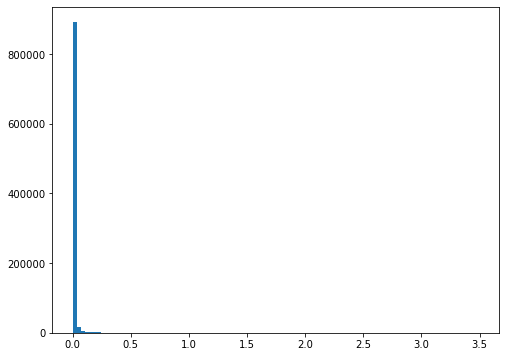

In [64]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.hist(diffs, bins=100)
plt.show()

In [66]:
print(np.mean(diffs))
print(np.std(diffs))

0.006559829
0.035407152
